In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 34, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 128)         0

<ipython-input-3-e12dec92d3cd>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
265/265 [==============================] - 5404s 20s/step - loss: 1.5026 - accuracy: 0.4888 - val_loss: 0.6212 - val_accuracy: 0.8224
Epoch 2/20
265/265 [==============================] - 84s 317ms/step - loss: 0.6525 - accuracy: 0.7898 - val_loss: 0.3558 - val_accuracy: 0.8882
Epoch 3/20
265/265 [==============================] - 87s 328ms/step - loss: 0.4616 - accuracy: 0.8497 - val_loss: 0.3076 - val_accuracy: 0.9018
Epoch 4/20
265/265 [==============================] - 85s 322ms/step - loss: 0.3615 - accuracy: 0.8800 - val_loss: 0.2274 - val_accuracy: 0.9304
Epoch 5/20
265/265 [==============================] - 82s 309ms/step - loss: 0.2983 - accuracy: 0.9009 - val_loss: 0.1820 - val_accuracy: 0.9440
Epoch 6/20
265/265 [==============================] - 84s 318ms/step - loss: 0.2537 - accuracy: 0.9153 - val_loss: 0.1438 - val_accuracy: 0.9538
Epoch 7/20
265/265 [==============================] - 82s 310ms/step - loss: 0.2295 - accuracy: 0.9243 - val_loss: 0.1277 - val_ac

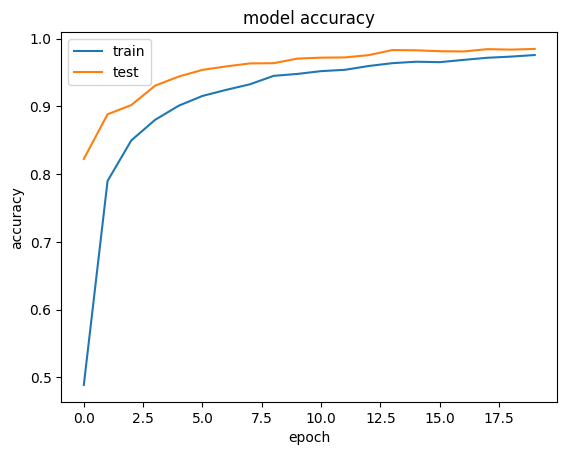

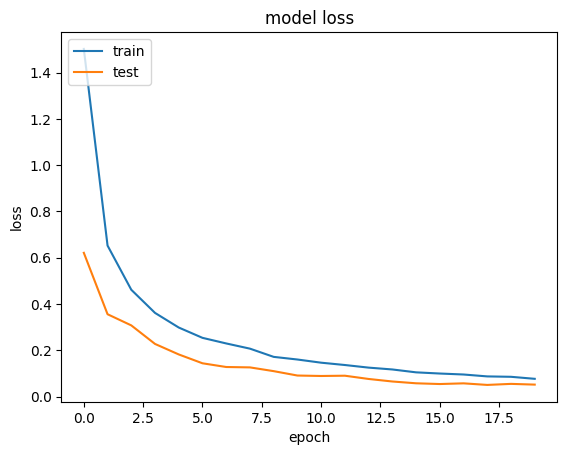

7437.7279896736145


In [ ]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from matplotlib import pyplot as plt
import time
import keras

start = time.time()
img_width, img_height = 71,71

train_data_dir = '/content/drive/MyDrive/17.devnagri/dataset/Train'
validation_data_dir = '/content/drive/MyDrive/17.devnagri/dataset/Test'
nb_train_samples = 17000
nb_validation_samples = 3000
epochs = 20
batch_size = 64

input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Use specific preprocessing function
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_saved.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()

end = time.time()
print(end - start)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Confusion Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get class names from generator
class_names = list(validation_generator.class_indices.keys())

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred, labels=np.arange(len(class_names))))

print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=class_names))


<ipython-input-4-e57c24add3ed>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[295   2   0   1   0   0   0   0   2   0]
 [  0 297   1   0   0   0   0   2   0   0]
 [  0   0 297   0   0   0   0   3   0   0]
 [  1   0   0 297   0   0   0   2   0   0]
 [  0   0   1   0 288   0   0  11   0   0]
 [  0   0   1   0   0 295   0   4   0   0]
 [  1   0   0   0   5   0 294   0   0   0]
 [  0   0   1   0   1   2   0 296   0   0]
 [  1   0   0   0   0   2   0   0 297   0]
 [  0   0   1   0   0   1   0   0   0 298]]
Classification Report
                  precision    recall  f1-score   support

character_10_yna       0.99      0.98      0.99       300
  character_1_ka       0.99      0.99      0.99       300
 character_2_kha       0.98      0.99      0.99       300
  character_3_ga       1.00      0.99      0.99       300
 character_4_gha       0.98      0.96      0.97       300
 character_5_kna       0.98      0.98      0.98       300
 character_6_cha       1.00      0.98      0.99       300
character_7_chha       0.93      0.99      0.96       300
  chara

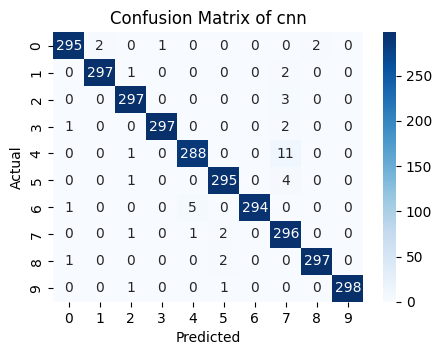

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of cnn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_cnn.png')

# Show the plot
plt.show()

**densenet201**

74836368/74836368 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               983552    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 19310666 (73.66 MB)
Trainable params: 19081

<ipython-input-2-d88244d4fbde>:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/20
265/265 [==============================] - 6049s 22s/step - loss: 0.5433 - accuracy: 0.8243 - val_loss: 0.0458 - val_accuracy: 0.9847
Epoch 2/20
265/265 [==============================] - 103s 387ms/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.0158 - val_accuracy: 0.9952
Epoch 3/20
265/265 [==============================] - 102s 386ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0159 - val_accuracy: 0.9949
Epoch 4/20
265/265 [==============================] - 103s 386ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0129 - val_accuracy: 0.9963
Epoch 5/20
265/265 [==============================] - 104s 391ms/step - loss: 0.0173 - accuracy: 0.9953 - val_loss: 0.0106 - val_accuracy: 0.9976
Epoch 6/20
265/265 [==============================] - 103s 387ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0073 - val_accuracy: 0.9976
Epoch 7/20
265/265 [==============================] - 105s 395ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0052 - 

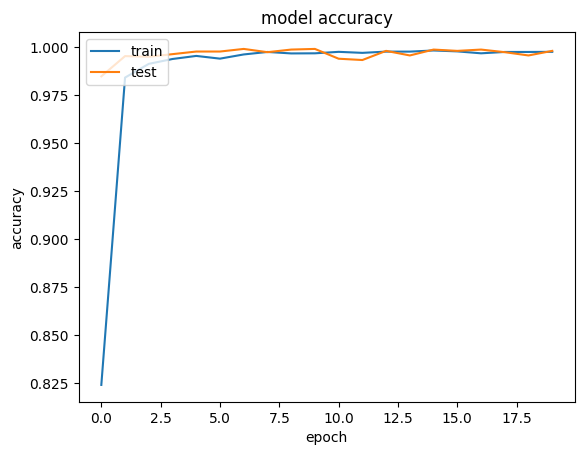

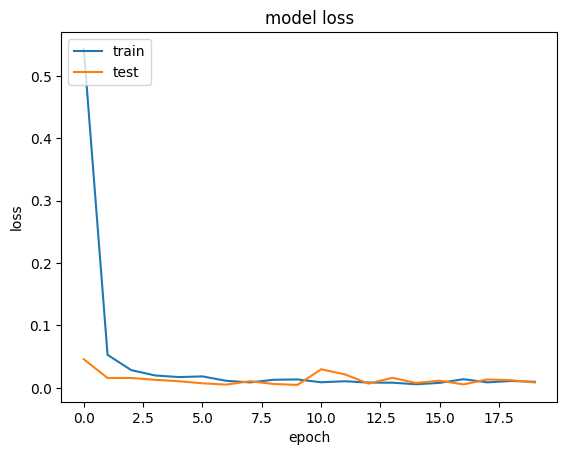

8270.928067684174


In [2]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.applications import DenseNet201
from matplotlib import pyplot as plt
import time
import keras

start = time.time()
img_width, img_height = 71, 71

train_data_dir = '/content/drive/MyDrive/17.devnagri/dataset/Train'
validation_data_dir = '/content/drive/MyDrive/17.devnagri/dataset/Test'
nb_train_samples = 17000
nb_validation_samples = 3000
epochs = 20
batch_size = 64

input_shape = (img_width, img_height, 3)

# Create a DenseNet201 model pre-trained on ImageNet
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Use specific preprocessing function
train_datagen = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(preprocessing_function=keras.applications.densenet.preprocess_input)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_saved.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()

end = time.time()
print(end - start)


classification report

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Confusion Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get class names from generator
class_names = list(validation_generator.class_indices.keys())

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred, labels=np.arange(len(class_names))))

print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=class_names))


<ipython-input-3-e57c24add3ed>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[299   0   0   0   0   0   0   0   1   0]
 [  0 300   0   0   0   0   0   0   0   0]
 [  0   0 300   0   0   0   0   0   0   0]
 [  1   0   0 299   0   0   0   0   0   0]
 [  0   0   0   0 299   0   0   1   0   0]
 [  0   0   0   0   0 299   0   0   1   0]
 [  0   0   0   0   1   0 299   0   0   0]
 [  0   0   0   0   1   0   0 299   0   0]
 [  0   0   0   0   0   0   0   0 300   0]
 [  0   0   0   0   0   0   0   0   0 300]]
Classification Report
                  precision    recall  f1-score   support

character_10_yna       1.00      1.00      1.00       300
  character_1_ka       1.00      1.00      1.00       300
 character_2_kha       1.00      1.00      1.00       300
  character_3_ga       1.00      1.00      1.00       300
 character_4_gha       0.99      1.00      1.00       300
 character_5_kna       1.00      1.00      1.00       300
 character_6_cha       1.00      1.00      1.00       300
character_7_chha       1.00      1.00      1.00       300
  chara

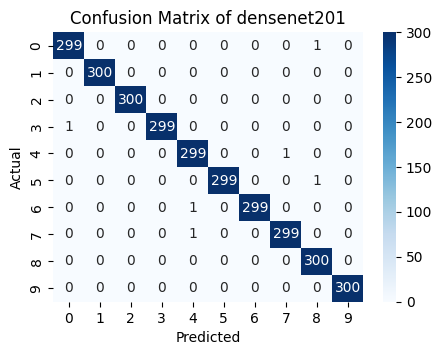

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of densenet201')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_densenet201.png')

# Show the plot
plt.show()

In [6]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from matplotlib import pyplot as plt
from keras.applications import DenseNet201
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import time
import keras
nb_train_samples = 17000
nb_validation_samples = 3000
epochs = 20
batch_size = 64

input_shape = (img_width, img_height, 3)

# Create a DenseNet201 model pre-trained on ImageNet
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 global_average_pooling2d (  (None, 1920)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 512)               983552    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 19310666 (73.66 MB)
Trainable params: 19081610 (72.79 MB)
Non-trainable params: 229056 (894.75 KB)
_______